# WCS RiskGuard
## AI Fruad Detection Model

#### Start with the likely imports and reading the data

In [8]:
# add imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [4]:
test_transactions = pd.read_csv(r'datasets/test_transaction.csv')
test_identity = pd.read_csv(r'datasets/test_identity.csv')
train_transactions = pd.read_csv(r'datasets/train_transaction.csv')
train_identity = pd.read_csv(r'datasets/train_identity.csv')

# merge train and test datasets independently on 'TransactionID'
train_data = train_transactions.merge(train_identity, on='TransactionID', how='left')
test_data = test_transactions.merge(test_identity, on='TransactionID', how='left')

# delete unused objects to save memory
del test_transactions, train_transactions, train_identity, test_identity



#### Begin data visualization

Display head of the table

In [5]:
print("Train Data Overview:")
display(train_data.head(7))
# train data pretty much looks the same

Train Data Overview:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Get some info about the table

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


Visualize fruad vs. non fruad distribution

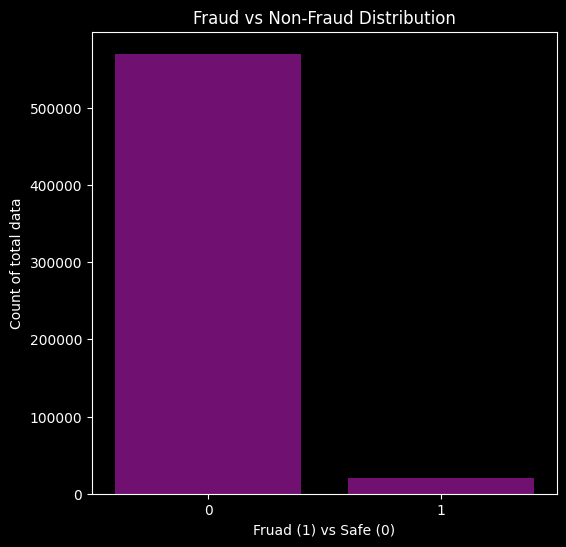

In [11]:
plt.style.use('dark_background')

# heatmap for the is fruad
plt.figure(figsize=(6, 6))
sns.countplot(x='isFraud', data=train_data, color='purple')
plt.ylabel('Count of total data', color='white')
plt.xlabel('Fruad (1) vs Safe (0)', color='white')
plt.title("Fraud vs Non-Fraud Distribution", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

Analyze the fruad vs transaction amount

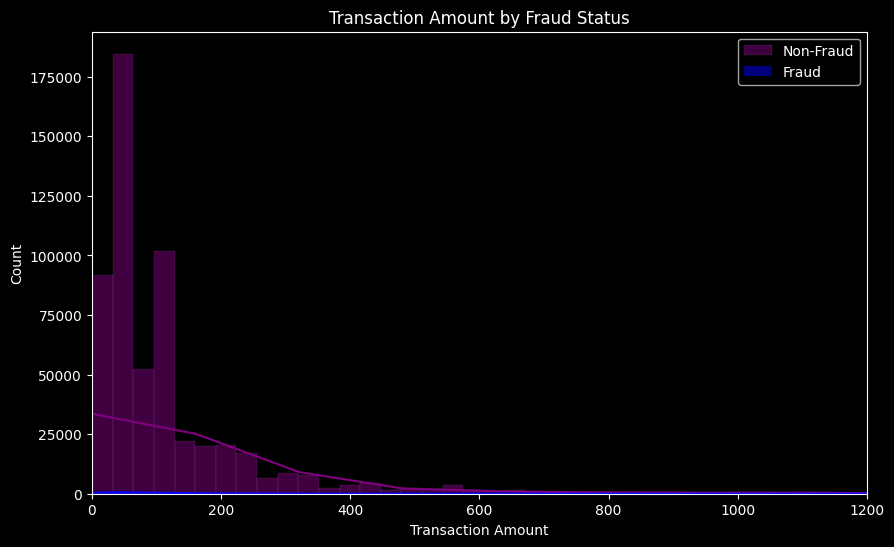

In [10]:
# Transaction Amount Analysis
plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['isFraud'] == 0]['TransactionAmt'], bins=1000, color='purple', label='Non-Fraud', kde=True)
sns.histplot(train_data[train_data['isFraud'] == 1]['TransactionAmt'], bins=1000, color='blue', label='Fraud', kde=True)
plt.title("Transaction Amount by Fraud Status", color='white')
plt.xlabel("Transaction Amount", color='white')
plt.xlim(0,1200)
plt.legend()
plt.show()

#FIXME Make it easier to see fruad data

#### Make the heatmap
There are far too many columns that do not have a significant correlation with fruad, so we need to find the ones that dont. NOTE: Running takes like at least two minutes on Eric's computer which is decently fast

In [6]:
numeric_data = train_data.select_dtypes(include=['number'])
# compute the correlations of all quantitative data with 'isFruad'
correlation_matrix = numeric_data.corr()

# only take the important columns that have correlation coefficients above 0.1 or below -0.1
important_columns2 = correlation_matrix['isFraud'][abs(correlation_matrix['isFraud']) > 0.2].index
important_columns3 = correlation_matrix['isFraud'][abs(correlation_matrix['isFraud']) > 0.3].index

important_data2 = numeric_data[important_columns2]
important_data3 = numeric_data[important_columns3]

Now we can plot:

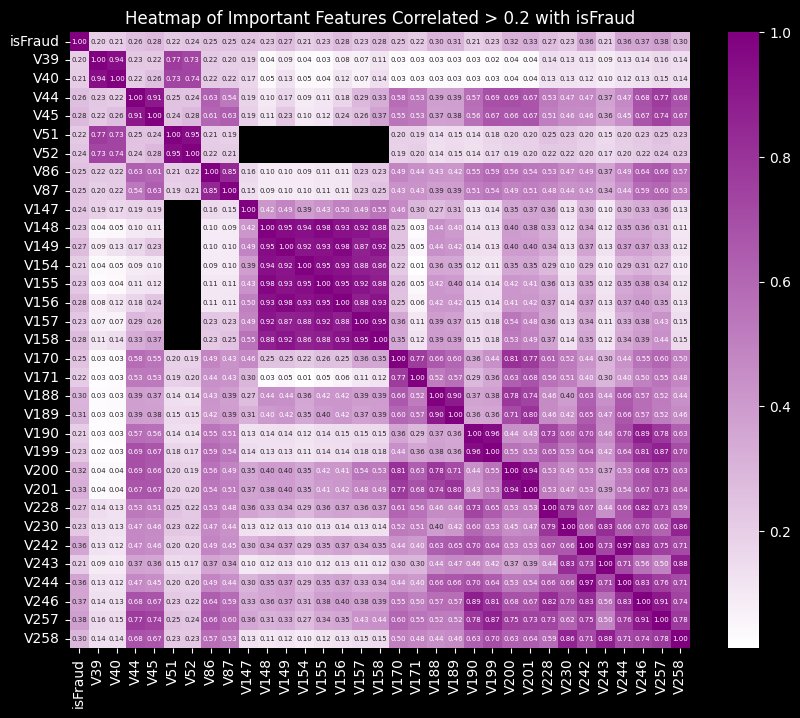

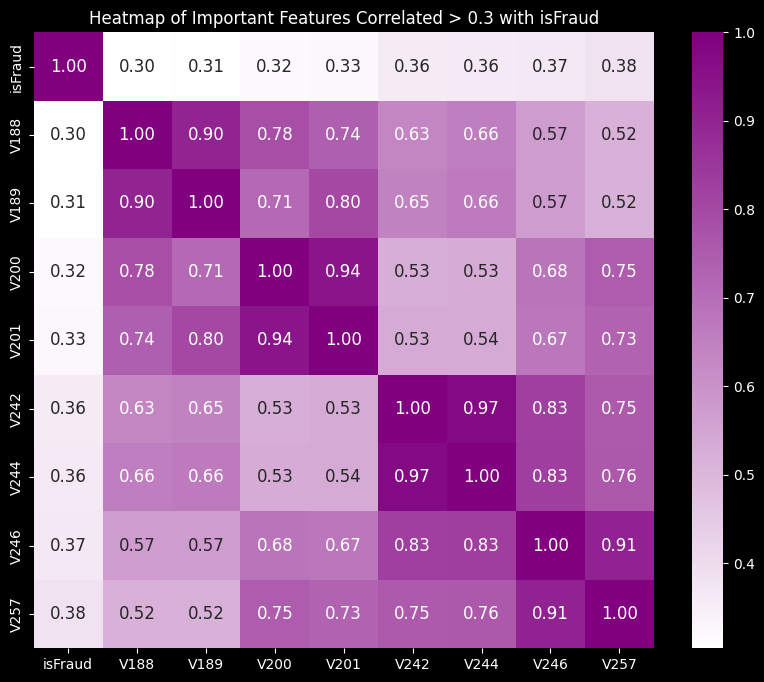

In [7]:
# Style stuff
colors = ["white", "purple"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
more_than_o2_size = {'size':5}
more_than_o3_size = {'size':12}

# Now we can plot both heat maps
plt.figure(figsize=(10, 8))
sns.heatmap(important_data2.corr(), annot=True, cmap=custom_cmap, fmt=".2f", annot_kws=more_than_o2_size)
plt.title("Heatmap of Important Features Correlated > 0.2 with isFraud", color='white')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(important_data3.corr(), annot=True, cmap=custom_cmap, fmt=".2f", annot_kws=more_than_o3_size)
plt.title("Heatmap of Important Features Correlated > 0.3 with isFraud", color='white')
plt.show()

Do analysis for some categorical vairables:

In [2]:
credit_debit_filtered_data = train_data[train_data['card6'].isin(['credit', 'debit'])]


plt.figure(figsize=(8, 4))
sns.countplot(x='card4', hue='isFraud', data=train_data)
plt.title(f"Distribution of card brand by Fraud Status", color='white')
plt.xlabel('Card brand', color='white')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='card6', hue='isFraud', data=credit_debit_filtered_data)
plt.xlabel('Transaction type', color='white')
plt.title(f"Distribution of credit/debit by Fraud Status", color='white')
plt.show()


NameError: name 'train_data' is not defined

## Tentative model Training

This is just a proof of concept that we can use on the server right now

In [8]:
import sys
print(f'Should be 3.11.x: {sys.version}')
import tensorflow as tf
print(tf.__version__)

import keras
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tf2onnx

print("Available GPUs:")
print(tf.config.list_physical_devices('GPU'))

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("GPU Name: ", tf.test.gpu_device_name())



Should be 3.11.x: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
2.18.0
Available GPUs:
[]
Num GPUs Available:  0
GPU Name:  
